In [95]:
import yfinance as yf
import matplotlib.pyplot as plt

/tmp/ipython-input-1332260497.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('RELIANCE.NS', start='2024-01-01', end='2025-12-30', multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


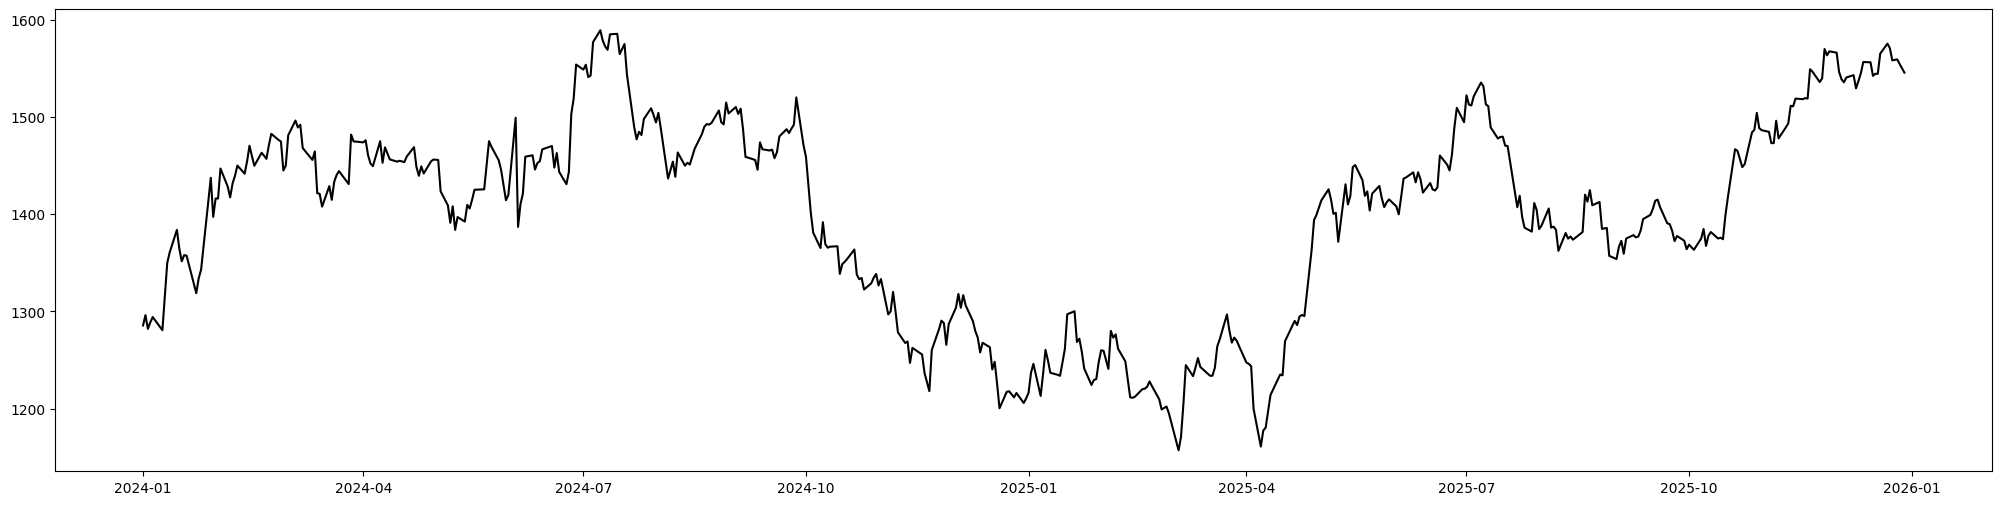

In [96]:
# multi_level_index=False to prevent columns from having multi level indices.
df = yf.download('RELIANCE.NS', start='2024-01-01', end='2025-12-30', multi_level_index=False)

plt.figure(figsize=(25, 6))
plt.plot(df['Close'], color='black')

# 1. Simple Moving Average (SMA)

In [97]:
def sma(df, short_period, long_period):
  # min_periods=1 avoid NaN values by considering a single data point for averaging.
  df['SHORT_SMA'] = df['Close'].rolling(window=short_period, min_periods=1).mean()
  df['LONG_SMA'] = df['Close'].rolling(window=long_period, min_periods=1).mean()
  return df

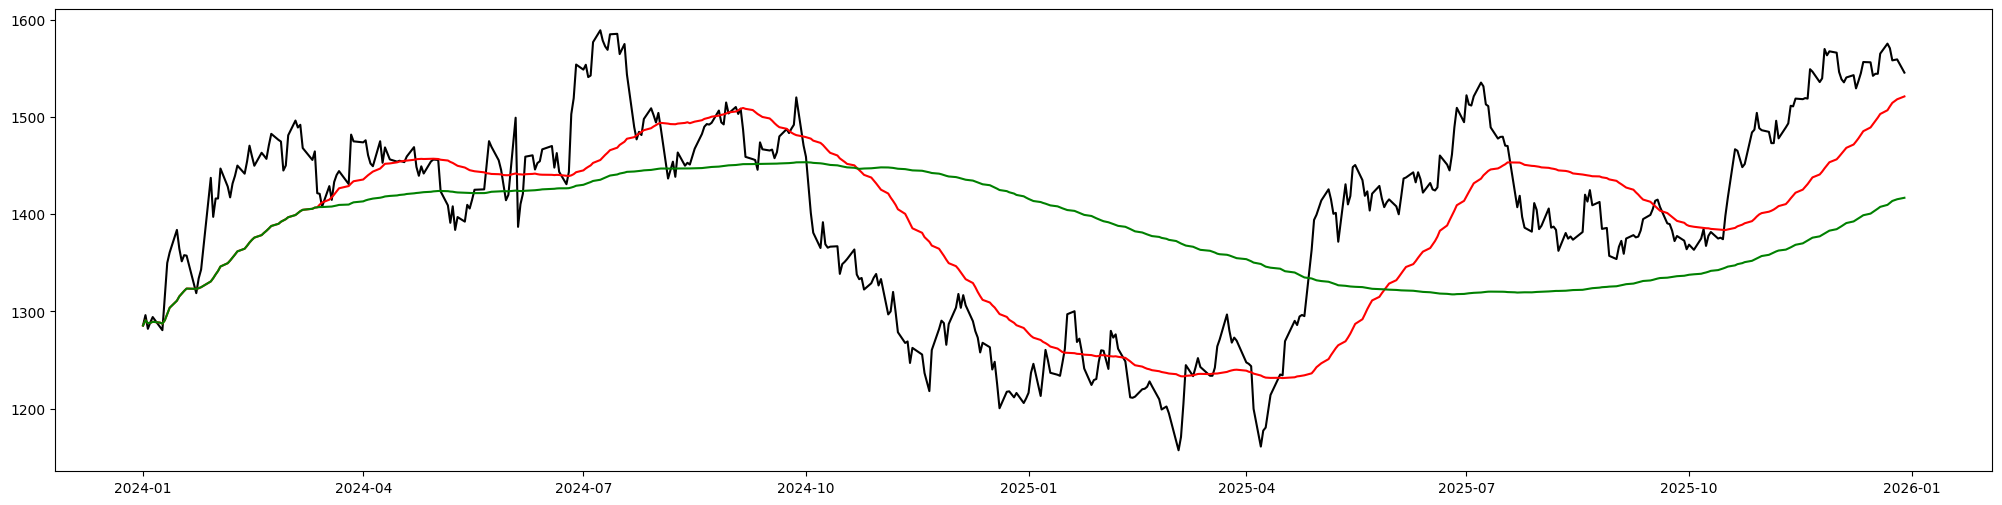

In [98]:
df = sma(df, short_period=50, long_period=200)

plt.figure(figsize=(25, 6))
plt.plot(df['Close'], color='black', label='Close')
plt.plot(df['SHORT_SMA'], color='red', label='50 Day SMA')
plt.plot(df['LONG_SMA'], color='green', label='200 Day SMA')

# 2. Gap Up and Gap Down Days

In [99]:
def identify_gap(df):
  up_signal = df[df['Close'] - df['Open'] > 0]
  down_signal = df[df['Close'] - df['Open'] < 0]
  return up_signal, down_signal

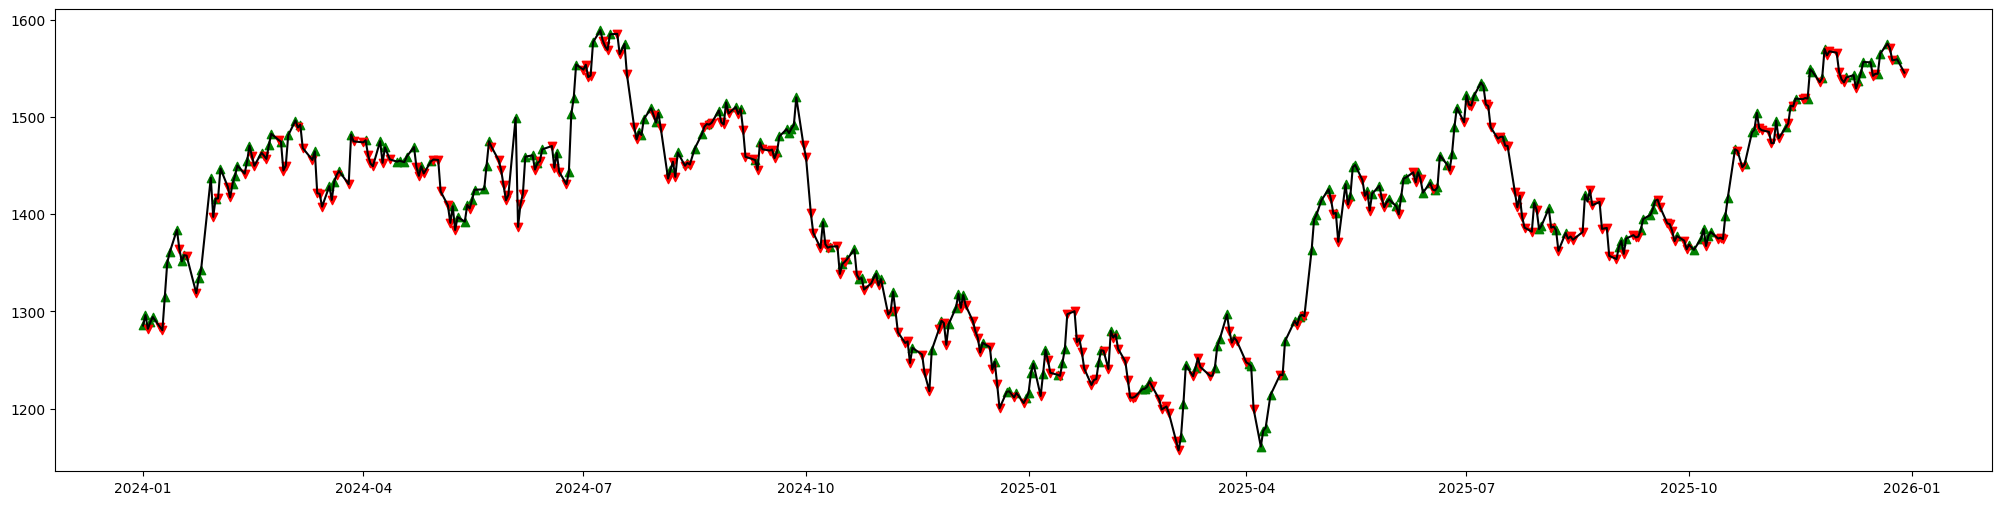

In [100]:
up_signal, down_signal = identify_gap(df)

plt.figure(figsize=(25, 6))
plt.plot(df['Close'], color='black')
plt.scatter(up_signal.index, up_signal['Close'], marker='^', color='green')
plt.scatter(down_signal.index, down_signal['Close'], marker='v', color='red')

# 3. Intraday VWAP Calculation

/tmp/ipython-input-2632698816.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('RELIANCE.NS', interval='1m', period='1d', multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


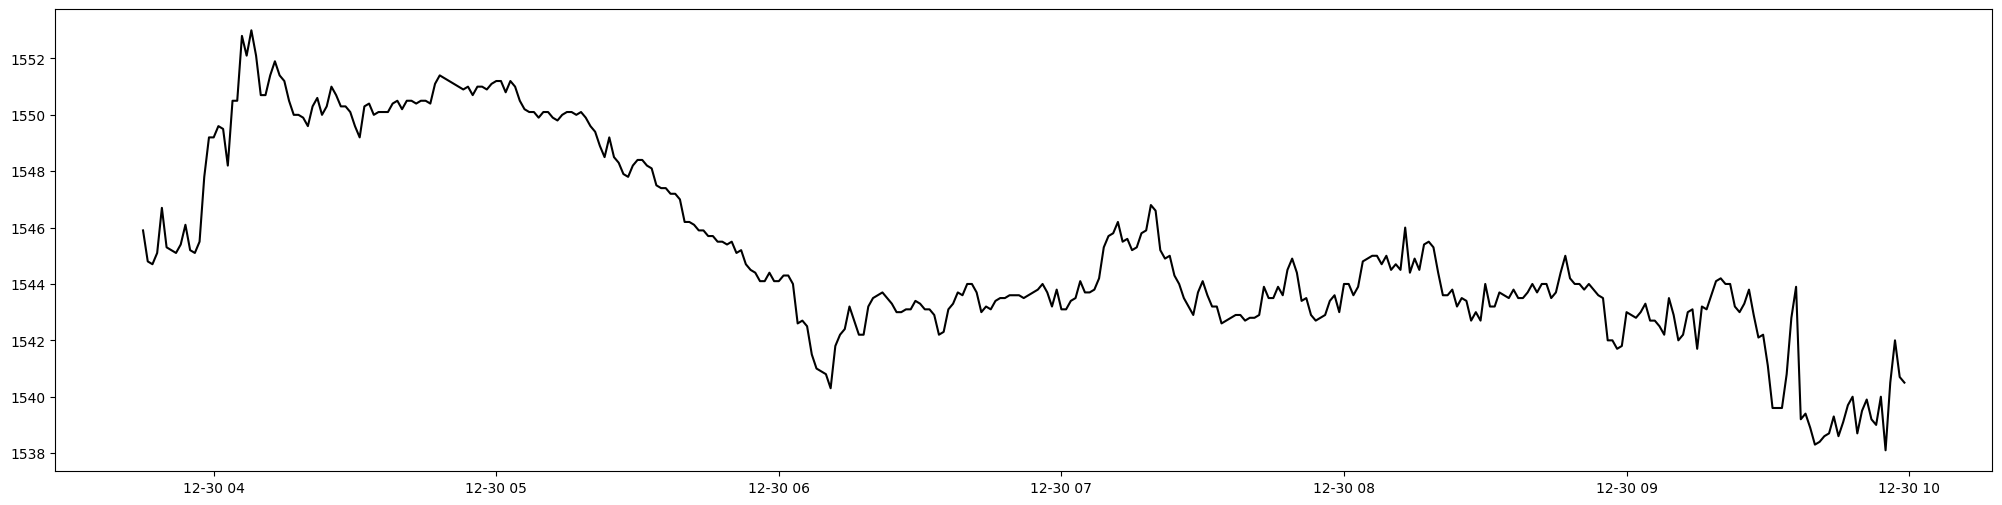

In [104]:
df = yf.download('RELIANCE.NS', interval='1m', period='1d', multi_level_index=False)

plt.figure(figsize=(25, 6))
plt.plot(df['Close'], color='black')

In [105]:
def vwap(df):
  df['Typical Price'] = (df['High'] + df['Low'] + df['Close']) / 3
  df['Price Volume Product'] = df['Typical Price'] * df['Volume']
  df['VWAP'] = df['Price Volume Product'].cumsum() / df['Volume'].cumsum()
  return df


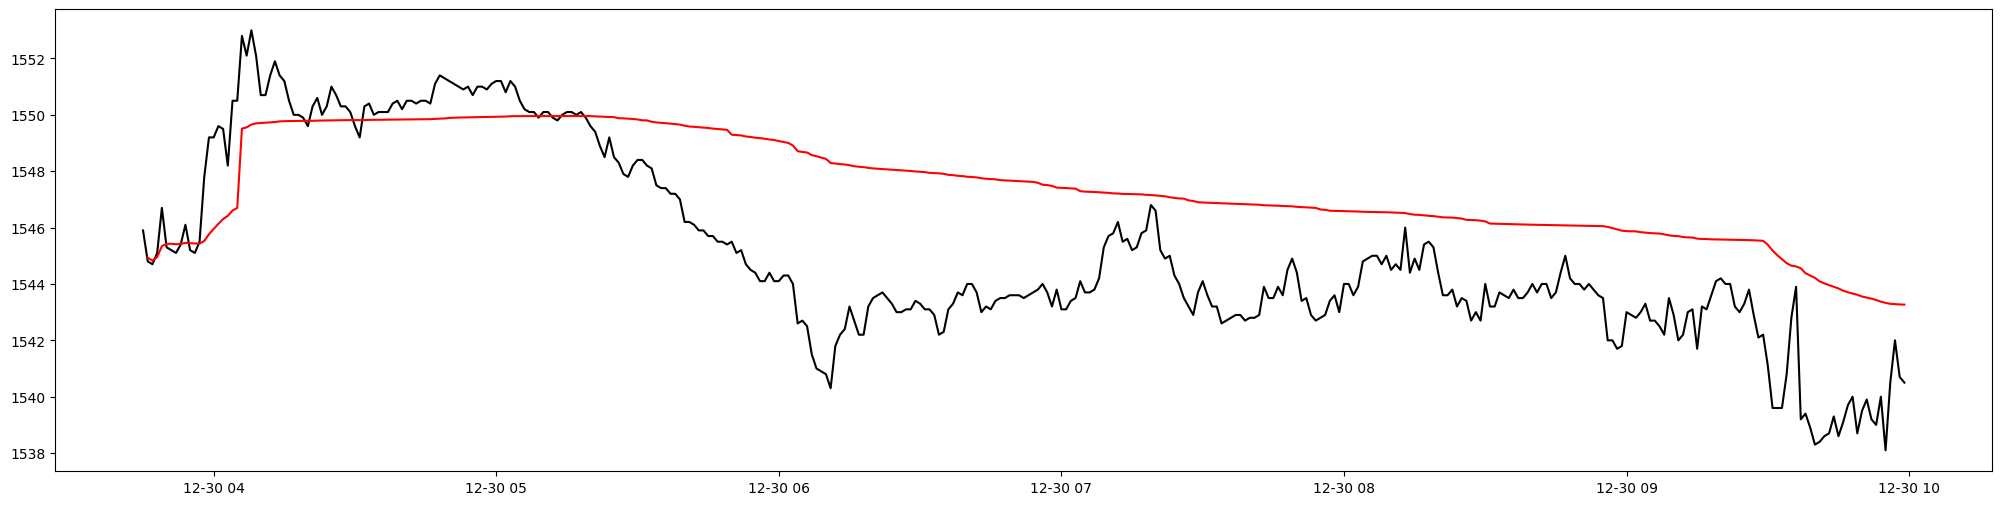

In [106]:
df = vwap(df)

plt.figure(figsize=(25, 6))
plt.plot(df['Close'], color='black')
plt.plot(df['VWAP'], color='red')